<a href="https://colab.research.google.com/github/Srija616/pyTorchTutorial/blob/main/01_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch Workflow

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn # nn contains the building blocks for neural networks

print (torch.__version__)

1.13.1+cu116


1. Data - Preparing and Loading

In [2]:
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step)
print (len(X))
y = weight*X + bias


50


Splitting the dataset - 80 -20

In [3]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

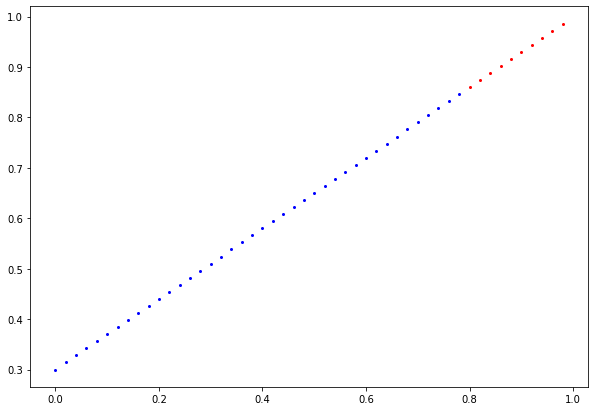

In [7]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c ="b", s=4, label ="Training data")
    plt.scatter(test_data, test_labels, c ="r", s=4, label ="Testing data")
    if (predictions!=None):
        plt.scatter(test_data, predictions, c ="g", s=4, label ="Predictions")

plot_predictions()

# Build Model
Linear Regression: Start with random values of Weight and bias, look at the training data and adjust the random values to get closer to the ideal values without overfitting on the data.

To achieve this Gradient Descent and Back-propagation is used.

Find the difference between the predicted and the target value and then using loss function, get a loss. We aim to reduce this loss by updating the weights and biases during the backpropagation step. 

Backpropagation:  (# add)

In [5]:
class LinearRegressionModel(nn.Module): 
    '''
    nn.Module has almost everything that PyTorch model needs - base class for all neural models. 
    '''
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor: # x is input
        return self.weights*x + self.bias

-torch.nn

-torch.nn.Parameter

-torch.nn.Module -> Subclass it, then override forward

-torch.optim = optimizers in pytorch live - help with gradient descent

-All nn.module require you to define the forward class.


The model is not trained. Below is the plot of predictions without training.

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


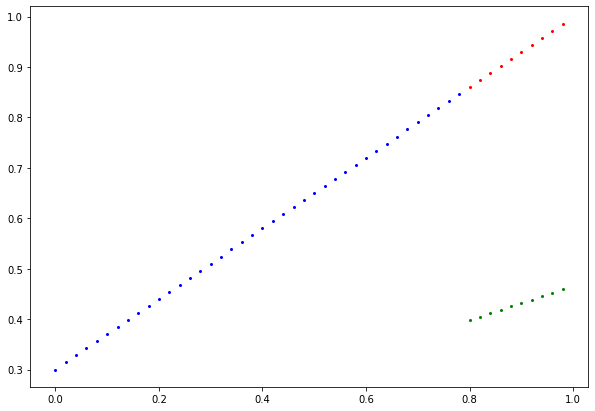

In [12]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of model we created
model_0 = LinearRegressionModel()

# list(model_0.parameters())

# Make predictions using torch.inference_model()
with torch.inference_mode():
    y_preds = model_0.forward(X_test)
    print (y_preds)
    plot_predictions(predictions = y_preds)

In [13]:
# Setup a loss function:
loss_func = nn.L1Loss()

# Select an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01, momentum=0.9) 

1. Loop through the data
2. Forward pass
3. Calculate loss
4. Optimizer zero_grad
5. Loss Backward - move backward through the network to calculate gradients wrt the loss
6. Optimzer step - use the optimizer to adjust the model params and reduce the model loss

Epoch:0 | Test: 0.48106518387794495
Epoch:10 | Test: 0.026505161076784134
Epoch:20 | Test: 0.1943041831254959
Epoch:30 | Test: 0.027078520506620407
Epoch:40 | Test: 0.001966828014701605
Epoch:50 | Test: 0.0101406155154109
Epoch:60 | Test: 0.02402856945991516
Epoch:70 | Test: 0.007351130247116089
Epoch:80 | Test: 0.009309673681855202
Epoch:90 | Test: 0.004079228732734919


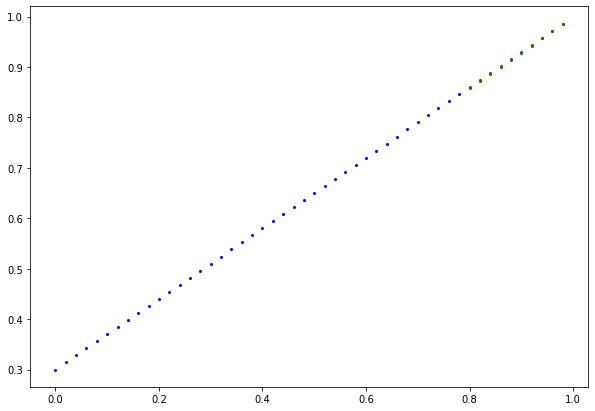

In [14]:
# An epoch is one loop through the data.

epochs = 100

for epoch in range(epochs):
    model_0.train()  # Sets all params that require grads to require grads
    
    # Forward pass and loss calculation
    y_predicted = model_0.forward(X_train)
    loss = loss_func(y_predicted, y_train)
    
    optimizer.zero_grad()
    # Perform backprop on the loss wrt the params of the model
    loss.backward()

    # Perform gradient descent
    optimizer.step()
    model_0.eval()
    with torch.inference_mode(): # faster than no_grad - old pytorch code
        test_pred = model_0.forward(X_test)
        loss = loss_func(test_pred, y_test)
    if (epoch%10 == 0):
        print (f"Epoch:{epoch} | Test: {loss}")
    if (epoch == 99):
        plot_predictions(predictions = test_pred)

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7081])), ('bias', tensor([0.2911]))])

In [16]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)
MODEL_NAME = "01_pytorch_workflow_linear_regression.pt"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

In [ ]:
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [ ]:
model = LinearRegressionModel()
model.state_dict(torch.load(MODEL_SAVE_PATH))

OrderedDict([('weights', tensor([-1.1229])), ('bias', tensor([-0.1863]))])